In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
dataset=pd.read_csv('diamonds.csv')

In [17]:
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [18]:
dataset.shape

(53940, 10)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
import pandas as pd

# Assuming 'diamonds_data' is your DataFrame
# Replace this with your actual DataFrame or load it from your source

# Check for duplicates
duplicate_rows = dataset[dataset.duplicated()]

# Display the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicates and update the DataFrame
dataset_no_duplicates = dataset.drop_duplicates()

# Display information after removing duplicates
print("\nDataFrame Info after removing duplicates:")
print(dataset_no_duplicates.info())

dataset = dataset.drop_duplicates(keep='last')

Duplicate Rows:
       carat    cut color clarity  depth  table     x     y     z  price
1005    0.79  Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
1006    0.79  Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
1007    0.79  Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
1008    0.79  Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
2025    1.52   Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
...      ...    ...   ...     ...    ...    ...   ...   ...   ...    ...
47969   0.52  Ideal     D     VS2   61.8   55.0  5.19  5.16  3.20   1919
49326   0.51  Ideal     F    VVS2   61.2   56.0  5.17  5.19  3.17   2093
49557   0.71   Good     F     SI2   64.1   60.0  0.00  0.00  0.00   2130
50079   0.51  Ideal     F    VVS2   61.2   56.0  5.19  5.17  3.17   2203
52861   0.50   Fair     E     VS2   79.0   73.0  5.21  5.18  4.09   2579

[146 rows x 10 columns]

DataFrame Info after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
In

In [21]:
dataset.shape

(53794, 10)

In [22]:
dataset.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
price      11602
dtype: int64

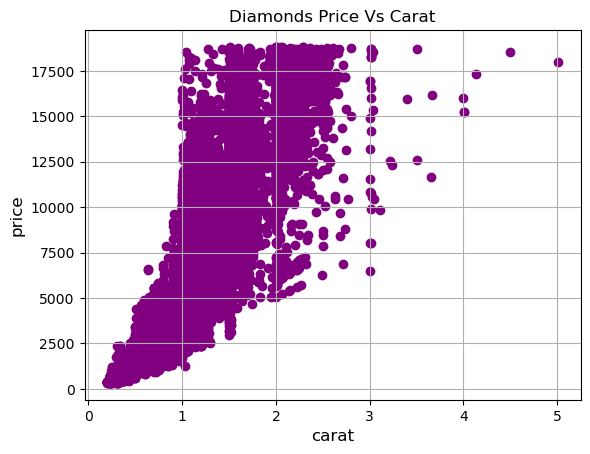

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(dataset)
plt.scatter(df['carat'],df['price'], color='purple')  
plt.title('Diamonds Price Vs Carat',fontsize=12)
plt.xlabel('carat',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.grid(True)
plt.show()

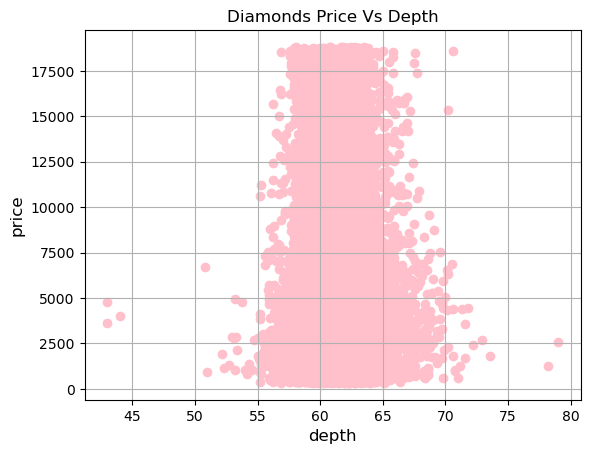

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(dataset)
plt.scatter(df['depth'],df['price'], color='pink')  
plt.title('Diamonds Price Vs Depth',fontsize=12)
plt.xlabel('depth',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.grid(True)
plt.show()

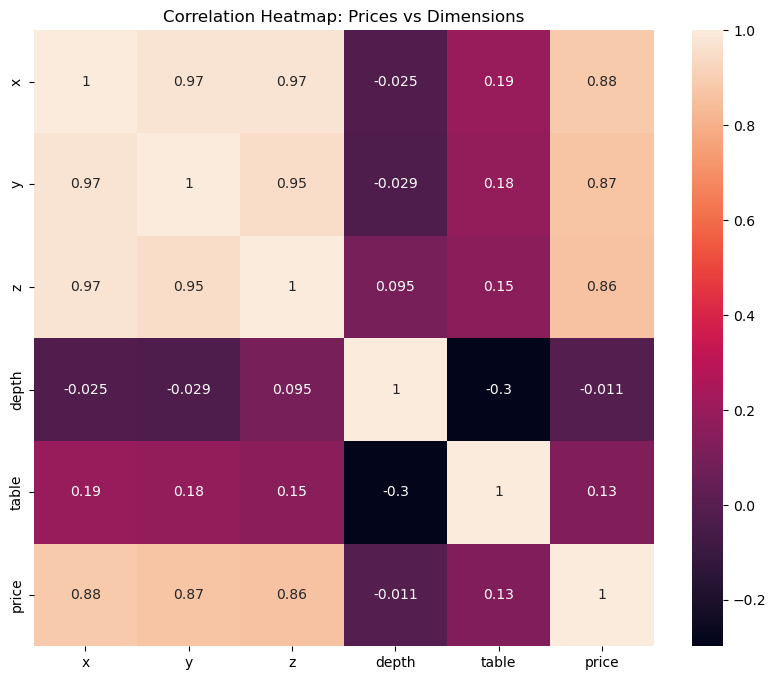

In [25]:
# Is there a pattern indicating that certain dimensions contribute more to higher prices?

diamonds_columns = ['x','y','z','depth','table','price']

# Calculate correlations between dimensions and price
correlation_matrix = dataset[diamonds_columns].corr()

# Plotting heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Heatmap: Prices vs Dimensions')
plt.show()

In [26]:
#clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
diamonds_data = pd.DataFrame(dataset)
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
diamonds_data['clarity'] = diamonds_data['clarity'].map(clarity_mapping)

In [27]:
#define mapping for diamonds color
alphabet_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
diamonds_data['color'] = diamonds_data['color'].map(alphabet_mapping)
#Define the mapping for diamond cuts
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
diamonds_data['cut'] = diamonds_data['cut'].map(cut_mapping)

In [28]:
# Calculate the volume
diamonds_data['volume'] = diamonds_data['x'] * diamonds_data['y'] * diamonds_data['z']
diamonds_data['volume'] = diamonds_data['volume'].round(2)
# Drop the 'x', 'y', and 'z' columns
diamonds_data = diamonds_data.drop(['x', 'y', 'z'], axis=1)

In [29]:
print(diamonds_data)


       carat  cut  color  clarity  depth  table  price  volume
0       0.23    5      5        2   61.5   55.0    326   38.20
1       0.21    4      5        3   59.8   61.0    326   34.51
2       0.23    2      5        5   56.9   65.0    327   38.08
3       0.29    4      9        4   62.4   58.0    334   46.72
4       0.31    2     10        2   63.3   58.0    335   51.92
...      ...  ...    ...      ...    ...    ...    ...     ...
53935   0.72    5      4        3   60.8   57.0   2757  115.92
53936   0.72    2      4        3   63.1   55.0   2757  118.11
53937   0.70    3      4        3   62.8   60.0   2757  114.45
53938   0.86    4      8        2   61.0   58.0   2757  140.77
53939   0.75    5      4        2   62.2   55.0   2757  124.57

[53794 rows x 8 columns]


In [30]:
diamonds_data.describe() 

,carat,cut,color,clarity,depth,table,price,volume
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,3.904134,6.593914,4.051920,61.748080,57.458109,3933.065082,129.826993
std,0.47339,1.116098,1.701117,1.646857,1.429909,2.233679,3988.114460,78.160809
min,0.20000,1.000000,4.000000,1.000000,43.000000,43.000000,326.000000,0.000000
25%,0.40000,3.000000,5.000000,3.000000,61.000000,56.000000,951.000000,65.190000
50%,0.70000,4.000000,7.000000,4.000000,61.800000,57.000000,2401.000000,114.840000
75%,1.04000,5.000000,8.000000,5.000000,62.500000,59.000000,5326.750000,170.820000
max,5.01000,5.000000,10.000000,8.000000,79.000000,95.000000,18823.000000,3840.600000


In [31]:
#Carat: Analyze the distribution of diamond weights. Identify the average weight (mean) and how spread out the weights are (standard deviation).

#Price: Understand the distribution of prices. Look for the average price (mean) and the range of prices (minimum and maximum).Depth: Examine the distribution of depth percentages. Assess the central tendency and spread of depth values.

#Table: Similar to depth, analyze the distribution of table percentages.

#x, y, z: Examine the dimensions of the diamonds. Look for the average dimensions and the spread of values.

#Cut, Color, Clarity: If these are categorical variables, you won't get numerical summary statistics, but you can analyze the frequency of each category using value_counts()./

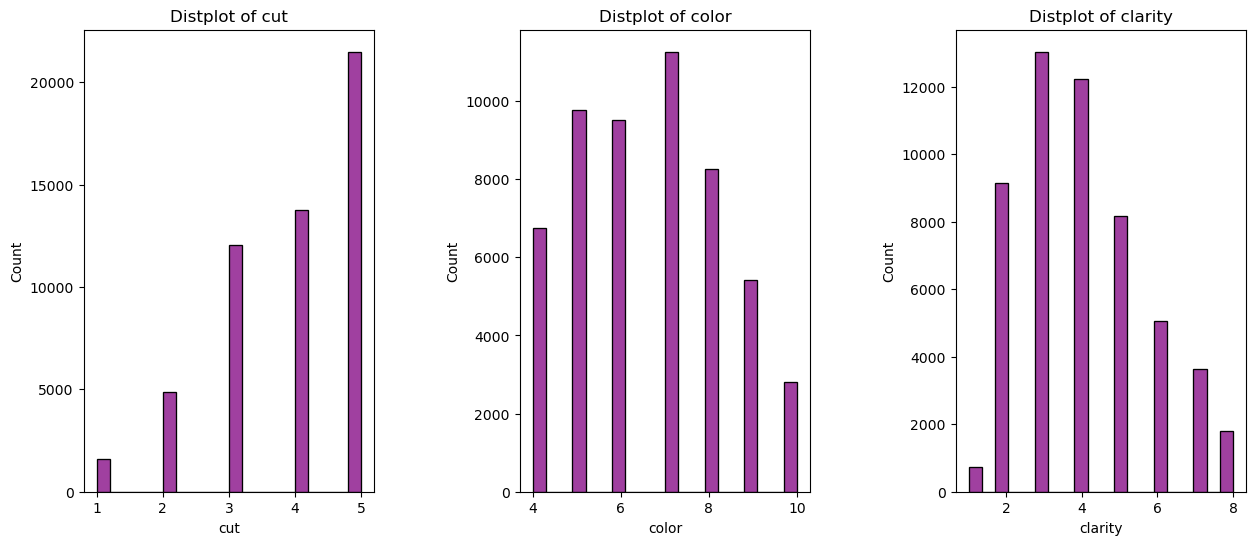

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 6))
n = 0

for x in ['cut', 'color', 'clarity']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(diamonds_data[x], bins=20, kde=False,color='purple')  # Using histplot for histograms
    plt.title('Distplot of {}'.format(x))  # Corrected title formatting

plt.show()

In [33]:
columns_for_X = list(range(6)) + [7]
X= diamonds_data.iloc[:,columns_for_X].values
y=diamonds_data.iloc[:,6].values

In [34]:
X

array([[  0.23,   5.  ,   5.  , ...,  61.5 ,  55.  ,  38.2 ],
       [  0.21,   4.  ,   5.  , ...,  59.8 ,  61.  ,  34.51],
       [  0.23,   2.  ,   5.  , ...,  56.9 ,  65.  ,  38.08],
       ...,
       [  0.7 ,   3.  ,   4.  , ...,  62.8 ,  60.  , 114.45],
       [  0.86,   4.  ,   8.  , ...,  61.  ,  58.  , 140.77],
       [  0.75,   5.  ,   4.  , ...,  62.2 ,  55.  , 124.57]])

In [35]:
y

array([ 326,  326,  327, ..., 2757, 2757, 2757], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
print(regressor.intercept_)


873.4444758858276


In [39]:
print(regressor.coef_) 


[ 8.68030222e+03  1.19160027e+02 -3.16366872e+02  5.18197532e+02
 -4.54677562e+01 -2.83546765e+01  7.58733002e-01]


In [40]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [41]:
df

,Actual,Predicted
0,432,-1735.374240
1,6964,5786.340199
2,2037,2823.539220
3,8451,7161.015936
4,1581,2200.151510
...,...,...
10754,1351,1832.396726
10755,1576,1873.834344
10756,3911,4836.321299
10757,3066,3974.682907


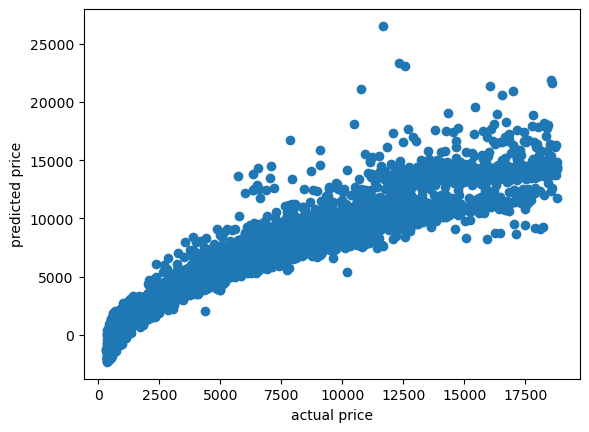

In [42]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#how close the data, 

0.9031260911056787